In [7]:
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from Model_Development.training import datagen

In [8]:
train_set, validation_set = datagen.split_data()
dataset_path = "../../processed_data"
image_size = 256
image_dataype = float
batch_size =8
print('Training Dataset:' + str(len(train_set)))
print('Validation Dataset:' + str(len(validation_set)))

Total CT scans :23271
Training Dataset:18617
Validation Dataset:4654


In [9]:
model = keras.models.load_model(os.path.join('../../models', 'liver_model.h5'), compile=False)
# model.summary()
model.compile()


In [10]:
valid_datagen = datagen.LiverDataGen(validation_set, dataset_path, scan_size=image_size, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(6, 256, 256, 3) (6, 256, 256, 1)


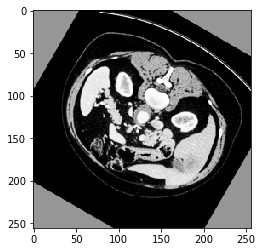

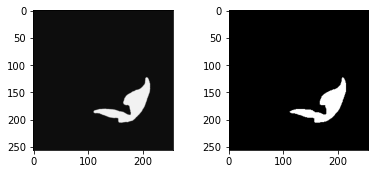

In [11]:
#Predicting individually
x, y = valid_datagen.__getitem__(581)

predict = model.predict(x)

print(x.shape, predict.shape)

datagen.display_scan(x[1])

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(predict[1]*255, (image_size, image_size)), cmap="gray")


In [12]:
from sklearn.metrics import confusion_matrix
y = []
result = []
## Dataset for testing
for i in range(1, 581, 1):
    x, y = valid_datagen.__getitem__(i)
    result = model.predict(x)
    result = result > 0.4

In [15]:

def dice(im1, im2):

    im1 = np.asarray(im1).astype(bool)
    im2 = np.asarray(im2).astype(bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())


print("Dice Coefficient " + str(dice(y,result)))

Dice Coefficient 0.7771165630599739
